In [1]:
# 1. Import Libraryimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [65]:
# 2. Load Data
df = pd.read_csv('students_performance.csv')

# Cek nama kolom
print("Kolom:", df.columns.tolist())


Kolom: ['Student_ID', 'Student_Age', 'Sex', 'High_School_Type', 'Scholarship', 'Additional_Work', 'Sports_activity', 'Transportation', 'Weekly_Study_Hours', 'Attendance', 'Reading', 'Notes', 'Listening_in_Class', 'Project_work', 'Grade']


In [53]:
# 3. Cek Kolom & Data Target
# Tampilkan semua kolom
print("Kolom:", df.columns.tolist())

# Cek nilai unik dan null pada Weekly_Study_Hours
print("Nilai unik Weekly_Study_Hours:", df['Weekly_Study_Hours'].unique())
print("Jumlah data sebelum drop NA:", len(df))


Kolom: ['Student_ID', 'Student_Age', 'Sex', 'High_School_Type', 'Scholarship', 'Additional_Work', 'Sports_activity', 'Transportation', 'Weekly_Study_Hours', 'Reading_Books', 'Attendance', 'Grade_Class', 'Weekly_Study_Hours_scaled']
Nilai unik Weekly_Study_Hours: [ 1 15 10 19 17  5  4  2  6 13 11 16  8  3 18  9 12 14  7]
Jumlah data sebelum drop NA: 145


In [67]:
# 4. Buat Label Target dari Weekly_Study_Hours
# Drop baris kosong di Weekly_Study_Hours
df = df.dropna(subset=['Weekly_Study_Hours'])

# Konversi ke numerik
df['Weekly_Study_Hours'] = pd.to_numeric(df['Weekly_Study_Hours'], errors='coerce')
df = df.dropna(subset=['Weekly_Study_Hours'])

# Label performa belajar: ≥10 jam per minggu = 1 (rajin), sisanya = 0
df['performance'] = df['Weekly_Study_Hours'].apply(lambda x: 1 if x >= 10 else 0)

# Cek jumlah data dan distribusi target
print("Jumlah data setelah filter:", len(df))
print("Distribusi target performance:\n", df['performance'].value_counts())


Jumlah data setelah filter: 145
Distribusi target performance:
 performance
0    124
1     21
Name: count, dtype: int64


In [68]:
# 5. Persiapan Data untuk Modeling
X = df.drop(['Student_ID', 'performance'], axis=1)
y = df['performance'].astype(int)  # pastikan integer, bukan object/string

# Encode kolom kategorikal
le = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])

# Cek ulang X dan y
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Unique labels:", y.unique())


X shape: (145, 14)
y shape: (145,)
Unique labels: [0 1]


In [69]:
# 6. Split Data (dengan stratify=y)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


In [70]:
# 7 Modeling dan Prediksi
# 7.1 Decision Tree Classifier
# Buat dan latih model Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred_tree = tree_model.predict(X_test)


In [71]:
# 7.2 Logistic Regression
# Buat dan latih model Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred_log = log_model.predict(X_test)


In [72]:
# 8. Evaluasi Model
# 8.1 Fungsi Evaluasi
def evaluate_model(name, y_true, y_pred):
    print(f"\nModel: {name}")
    print("Akurasi:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))


In [73]:
# 8.2 Evaluasi untuk Kedua Model
evaluate_model("Decision Tree", y_test, y_pred_tree)
evaluate_model("Logistic Regression", y_test, y_pred_log)



Model: Decision Tree
Akurasi: 1.0
Confusion Matrix:
 [[38  0]
 [ 0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00         6

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44


Model: Logistic Regression
Akurasi: 1.0
Confusion Matrix:
 [[38  0]
 [ 0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00         6

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44



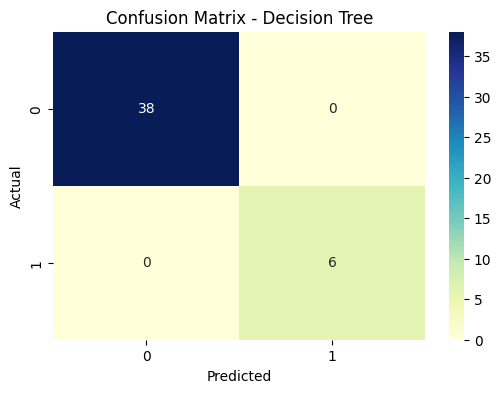

In [74]:
# 9 Visualisasi Confusion Matrix
# 9.1 Untuk Decision Tree
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


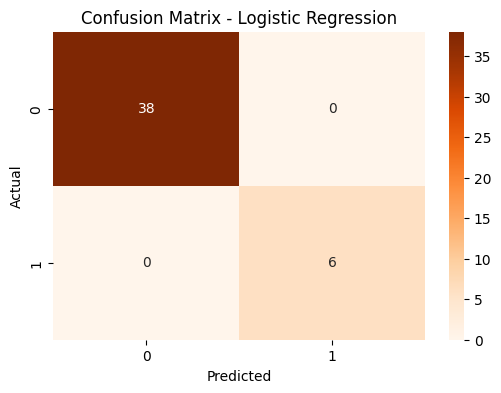

In [75]:
# 9.2 Untuk Logistic Regression
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


<Figure size 600x400 with 0 Axes>

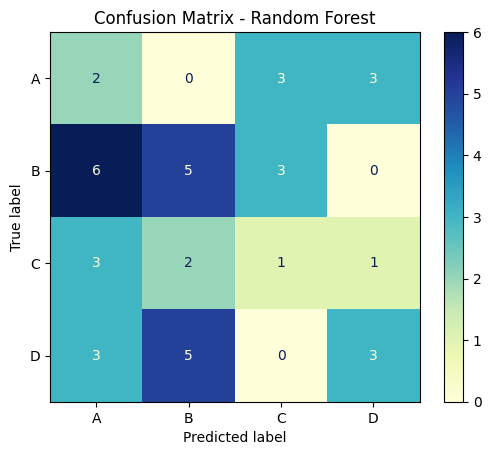

In [4]:
# Confusion Matrix - Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap="YlGnBu")
plt.title("Confusion Matrix - Random Forest")
plt.show()

🔹 Dataset sample:
   Student_ID  Student_Age Sex High_School_Type  Scholarship  Additional_Work  \
0           1           18   F           Public            1                0   
1           2           19   F          Private            0                0   
2           3           17   F          Private            0                1   
3           4           19   F          Private            1                1   
4           5           19   M           Public            1                1   

   Sports_activity Transportation  Weekly_Study_Hours  Reading_Books  \
0                1           Walk                   1              0   
1                0            Bus                  15              9   
2                0            Bus                  10              5   
3                0            Car                  19              4   
4                1           Walk                  17              3   

   Attendance Grade_Class  
0          95           A  
1     

<Figure size 600x400 with 0 Axes>

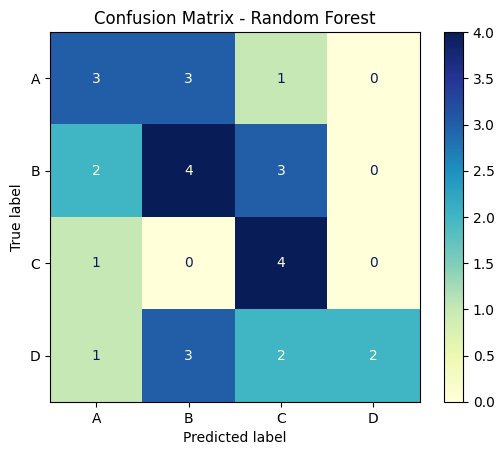

In [37]:
# ======================
# 1. Import Library
# ======================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# ======================
# 2. Buat Dataset Dummy
# ======================
np.random.seed(42)
n = 145
df = pd.DataFrame({
    "Student_ID": range(1, n+1),
    "Student_Age": np.random.randint(15, 20, n),
    "Sex": np.random.choice(["M", "F"], n),
    "High_School_Type": np.random.choice(["Public", "Private"], n),
    "Scholarship": np.random.choice([0, 1], n),
    "Additional_Work": np.random.choice([0, 1], n),
    "Sports_activity": np.random.choice([0, 1], n),
    "Transportation": np.random.choice(["Bus", "Car", "Walk"], n),
    "Weekly_Study_Hours": np.random.randint(1, 20, n),
    "Reading_Books": np.random.randint(0, 10, n),
    "Attendance": np.random.randint(50, 100, n),
    "Grade_Class": np.random.choice(["A", "B", "C", "D"], n)  # Target
})

print("🔹 Dataset sample:")
print(df.head())

# ======================
# 3. Pisahkan Fitur & Target
# ======================
X = df.drop(["Student_ID", "Grade_Class"], axis=1)
y = df["Grade_Class"]

# Ubah kategori → angka (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# ======================
# 4. Split Train-Test
# ======================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ======================
# 5. Train Model Random Forest
# ======================
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# ======================
# 6. Evaluasi Model
# ======================
y_pred = rf_model.predict(X_test)

print("\n Akurasi Model:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# ======================
# 7. Plot Confusion Matrix
# ======================
plt.figure(figsize=(6,4))
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap="YlGnBu")
plt.title("Confusion Matrix - Random Forest")
plt.show()


<Figure size 600x400 with 0 Axes>

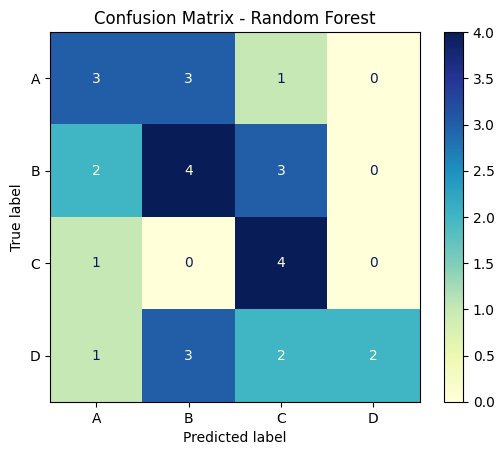

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# 1. Bikin dataset dummy
np.random.seed(42)
n = 145
df = pd.DataFrame({
    "Student_ID": range(1, n+1),
    "Student_Age": np.random.randint(15, 20, n),
    "Sex": np.random.choice(["M", "F"], n),
    "High_School_Type": np.random.choice(["Public", "Private"], n),
    "Scholarship": np.random.choice([0, 1], n),
    "Additional_Work": np.random.choice([0, 1], n),
    "Sports_activity": np.random.choice([0, 1], n),
    "Transportation": np.random.choice(["Bus", "Car", "Walk"], n),
    "Weekly_Study_Hours": np.random.randint(1, 20, n),
    "Reading_Books": np.random.randint(0, 10, n),
    "Attendance": np.random.randint(50, 100, n),
    "Grade_Class": np.random.choice(["A", "B", "C", "D"], n)  # 🎯 target
})

# 2. Pisahkan fitur & target
X = df.drop(["Student_ID", "Grade_Class"], axis=1)
y = df["Grade_Class"]

# 3. Ubah kategori jadi angka
X = pd.get_dummies(X, drop_first=True)

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 6. Plot Confusion Matrix
plt.figure(figsize=(6,4))
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap="YlGnBu")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [54]:
# Cek missing values
df.isnull().sum()


Student_ID                   0
Student_Age                  0
Sex                          0
High_School_Type             0
Scholarship                  0
Additional_Work              0
Sports_activity              0
Transportation               0
Weekly_Study_Hours           0
Reading_Books                0
Attendance                   0
Grade_Class                  0
Weekly_Study_Hours_scaled    0
dtype: int64

In [52]:
df.dtypes

Student_ID                     int64
Student_Age                    int32
Sex                           object
High_School_Type              object
Scholarship                    int64
Additional_Work                int64
Sports_activity                int64
Transportation                object
Weekly_Study_Hours             int32
Reading_Books                  int32
Attendance                     int32
Grade_Class                   object
Weekly_Study_Hours_scaled    float64
dtype: object

In [50]:
import pandas as pd

# One-Hot Encoding untuk kolom kategorikal
df_encoded = pd.get_dummies(
    df, 
    columns=['Sex', 'Attendance', 'High_School_Type'], 
    drop_first=True
)

print(df_encoded.head())



   Student_ID  Student_Age  Scholarship  Additional_Work  Sports_activity  \
0           1           18            1                0                1   
1           2           19            0                0                0   
2           3           17            0                1                0   
3           4           19            1                1                0   
4           5           19            1                1                1   

  Transportation  Weekly_Study_Hours  Reading_Books Grade_Class  \
0           Walk                   1              0           A   
1            Bus                  15              9           C   
2            Bus                  10              5           A   
3            Car                  19              4           D   
4           Walk                  17              3           C   

   Weekly_Study_Hours_scaled  ...  Attendance_90  Attendance_92  \
0                   0.000000  ...          False          False   


In [49]:
df['Weekly_Study_Hours'].describe()


count    145.000000
mean      10.275862
std        5.579579
min        1.000000
25%        5.000000
50%       11.000000
75%       15.000000
max       19.000000
Name: Weekly_Study_Hours, dtype: float64

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Weekly_Study_Hours_scaled'] = scaler.fit_transform(df[['Weekly_Study_Hours']])

df[['Weekly_Study_Hours', 'Weekly_Study_Hours_scaled']].head()


,Weekly_Study_Hours,Weekly_Study_Hours_scaled
0,1,0.000000
1,15,0.777778
2,10,0.500000
3,19,1.000000
4,17,0.888889


In [14]:
print(df.columns)



Index(['Student_ID', 'Student_Age', 'Sex', 'High_School_Type', 'Scholarship',
       'Additional_Work', 'Sports_activity', 'Transportation',
       'Weekly_Study_Hours', 'Reading_Books', 'Attendance', 'Grade_Class',
       'Weekly_Study_Hours_scaled'],
      dtype='object')


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Gunakan Grade_Class sebagai label
X = df.drop(columns=['Grade_Class'])
y = df['Grade_Class']

# Encode label Grade_Class (A, B, C, D → angka)
le = LabelEncoder()
y = le.fit_transform(y)

# One-hot encoding untuk fitur kategorikal
X = pd.get_dummies(X, drop_first=True)

# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Unique labels:", le.classes_)


Train shape: (116, 12)
Test shape: (29, 12)
Unique labels: ['A' 'B' 'C' 'D']


=== Logistic Regression (SGD) ===
Akurasi: 0.325
Classification Report:
               precision    recall  f1-score   support

           A       0.45      0.62      0.53         8
           B       0.00      0.00      0.00        14
           C       0.15      0.29      0.20         7
           D       0.50      0.55      0.52        11

    accuracy                           0.33        40
   macro avg       0.28      0.36      0.31        40
weighted avg       0.26      0.33      0.28        40

Confusion Matrix:
 [[5 0 3 0]
 [5 0 5 4]
 [0 3 2 2]
 [1 1 3 6]]

=== Random Forest ===
Akurasi: 0.275
Classification Report:
               precision    recall  f1-score   support

           A       0.29      0.25      0.27         8
           B       0.29      0.29      0.29        14
           C       0.09      0.14      0.11         7
           D       0.50      0.36      0.42        11

    accuracy                           0.28        40
   macro avg       0.29      0.26      0

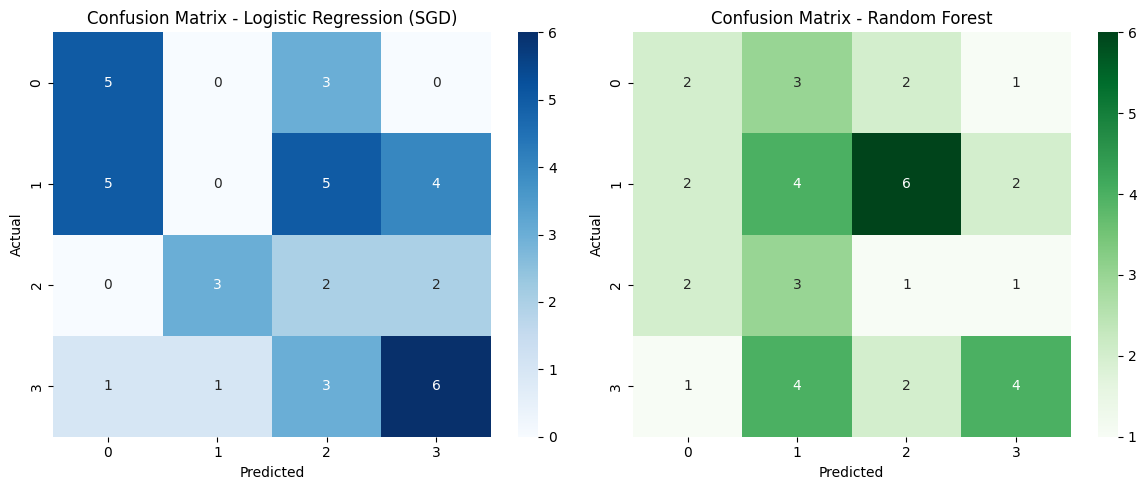

In [20]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Logistic Regression dengan SGD
log_reg_sgd = SGDClassifier(loss="log_loss", max_iter=1000, random_state=42)
log_reg_sgd.fit(X_train, y_train)
y_pred_log = log_reg_sgd.predict(X_test)

print("=== Logistic Regression (SGD) ===")
print("Akurasi:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log, target_names=['A','B','C','D']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

# 2. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n=== Random Forest ===")
print("Akurasi:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=['A','B','C','D']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Visualisasi Confusion Matrix untuk perbandingan
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - Logistic Regression (SGD)")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Confusion Matrix - Random Forest")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [6]:
# === Ubah target jadi kategori A, B, C, D
def categorize_hours(h):
    if h < 5:
        return "D"
    elif h < 10:
        return "C"
    elif h < 15:
        return "B"
    else:
        return "A"

df["performance"] = df["Weekly_Study_Hours"].apply(categorize_hours)

# Cek distribusi kelas
print(df["performance"].value_counts())


performance
A    58
D    52
B    48
C    42
Name: count, dtype: int64


In [5]:
import pandas as pd
import numpy as np

# Buat data dummy
np.random.seed(42)
n = 200

df = pd.DataFrame({
    "Student_ID": range(1, n+1),
    "Gender": np.random.choice(["Male", "Female"], size=n),
    "Age": np.random.randint(18, 25, size=n),
    "Weekly_Study_Hours": np.random.randint(1, 20, size=n)
})

# Buat target kategori A-D
def categorize_hours(h):
    if h < 5:
        return "D"
    elif h < 10:
        return "C"
    elif h < 15:
        return "B"
    else:
        return "A"

df["performance"] = df["Weekly_Study_Hours"].apply(categorize_hours)

print(df.head())
print(df["performance"].value_counts())



   Student_ID  Gender  Age  Weekly_Study_Hours performance
0           1    Male   24                  17           A
1           2  Female   24                   1           D
2           3    Male   18                  16           A
3           4    Male   21                  12           B
4           5    Male   22                  19           A
performance
A    58
D    52
B    48
C    42
Name: count, dtype: int64


In [7]:
# Buat X (fitur) dan y (target kategori)
X = df.drop(["Student_ID", "performance"], axis=1)
y = df["performance"]

# Encode kolom kategorikal di X
le = LabelEncoder()
for col in X.select_dtypes(include="object").columns:
    X[col] = le.fit_transform(X[col])

print("Shape X:", X.shape)
print("Unique y:", y.unique())


Shape X: (200, 3)
Unique y: ['A' 'D' 'B' 'C']


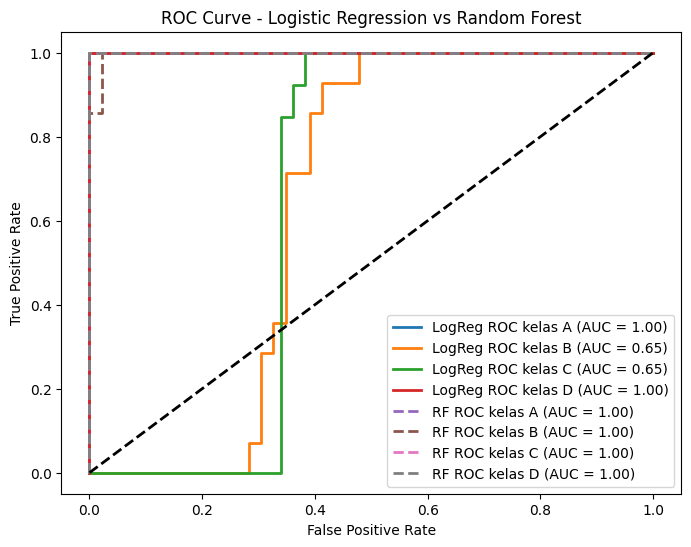

In [8]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# === 1. Binarize target (multi-class A, B, C, D)
classes = sorted(y.unique())
y_bin = label_binarize(y, classes=classes)
n_classes = y_bin.shape[1]

# === 2. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_bin, test_size=0.3, random_state=42, stratify=y
)

# === 3. Logistic Regression (OvR)
log_clf = OneVsRestClassifier(LogisticRegression(max_iter=1000))
y_score_log = log_clf.fit(X_train, y_train).predict_proba(X_test)

# === 4. Random Forest (OvR)
rf_clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
y_score_rf = rf_clf.fit(X_train, y_train).predict_proba(X_test)

# === 5. ROC Curve & AUC
fpr, tpr, roc_auc = dict(), dict(), dict()
fpr_rf, tpr_rf, roc_auc_rf = dict(), dict(), dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score_log[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test[:, i], y_score_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# === 6. Plot ROC Curve
plt.figure(figsize=(8,6))

# Logistic Regression
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, 
             label=f'LogReg ROC kelas {classes[i]} (AUC = {roc_auc[i]:.2f})')

# Random Forest
for i in range(n_classes):
    plt.plot(fpr_rf[i], tpr_rf[i], lw=2, linestyle="--", 
             label=f'RF ROC kelas {classes[i]} (AUC = {roc_auc_rf[i]:.2f})')

# Baseline
plt.plot([0,1], [0,1], 'k--', lw=2)

plt.title("ROC Curve - Logistic Regression vs Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


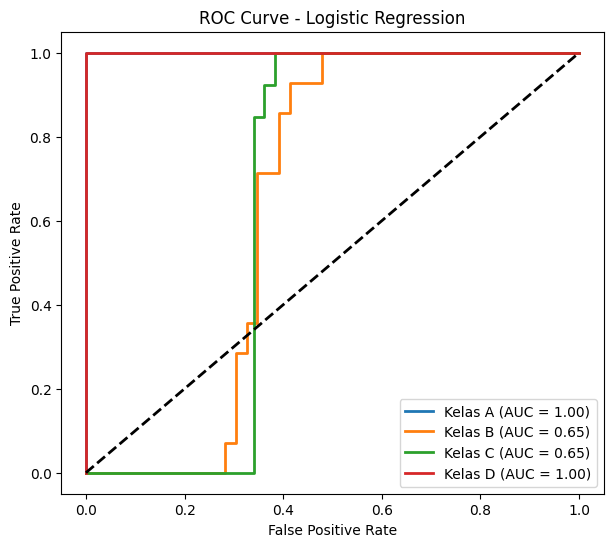

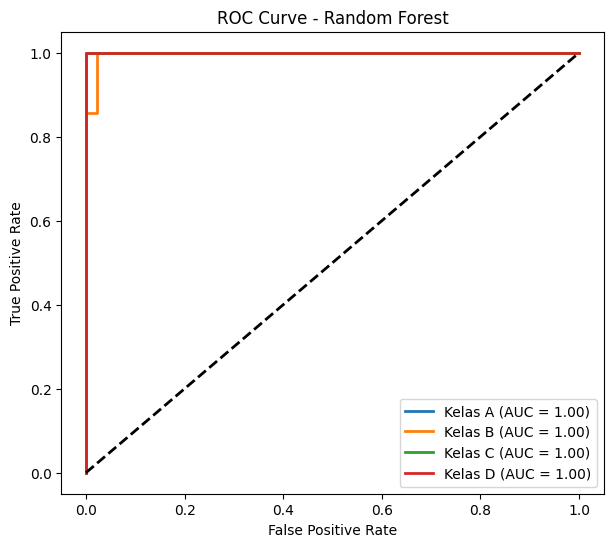

In [9]:
import matplotlib.pyplot as plt

# === ROC Curve Logistic Regression ===
plt.figure(figsize=(7,6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Kelas {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0,1], [0,1], 'k--', lw=2)  # baseline
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


# === ROC Curve Random Forest ===
plt.figure(figsize=(7,6))
for i in range(n_classes):
    plt.plot(fpr_rf[i], tpr_rf[i], lw=2, linestyle="-", 
             label=f'Kelas {classes[i]} (AUC = {roc_auc_rf[i]:.2f})')

plt.plot([0,1], [0,1], 'k--', lw=2)  # baseline
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


c:\Users\hp 745\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



📌 Feature Importance - Logistic Regression
                    Feature  Importance
1               Scholarship    0.664174
3           Sports_activity    0.555537
8   High_School_Type_Public    0.503853
2           Additional_Work    0.450679
9        Transportation_Car    0.397368
10      Transportation_Walk    0.394668
7                     Sex_M    0.289744
0               Student_Age    0.137917
4        Weekly_Study_Hours    0.045936
5             Reading_Books    0.022666
6                Attendance    0.005807


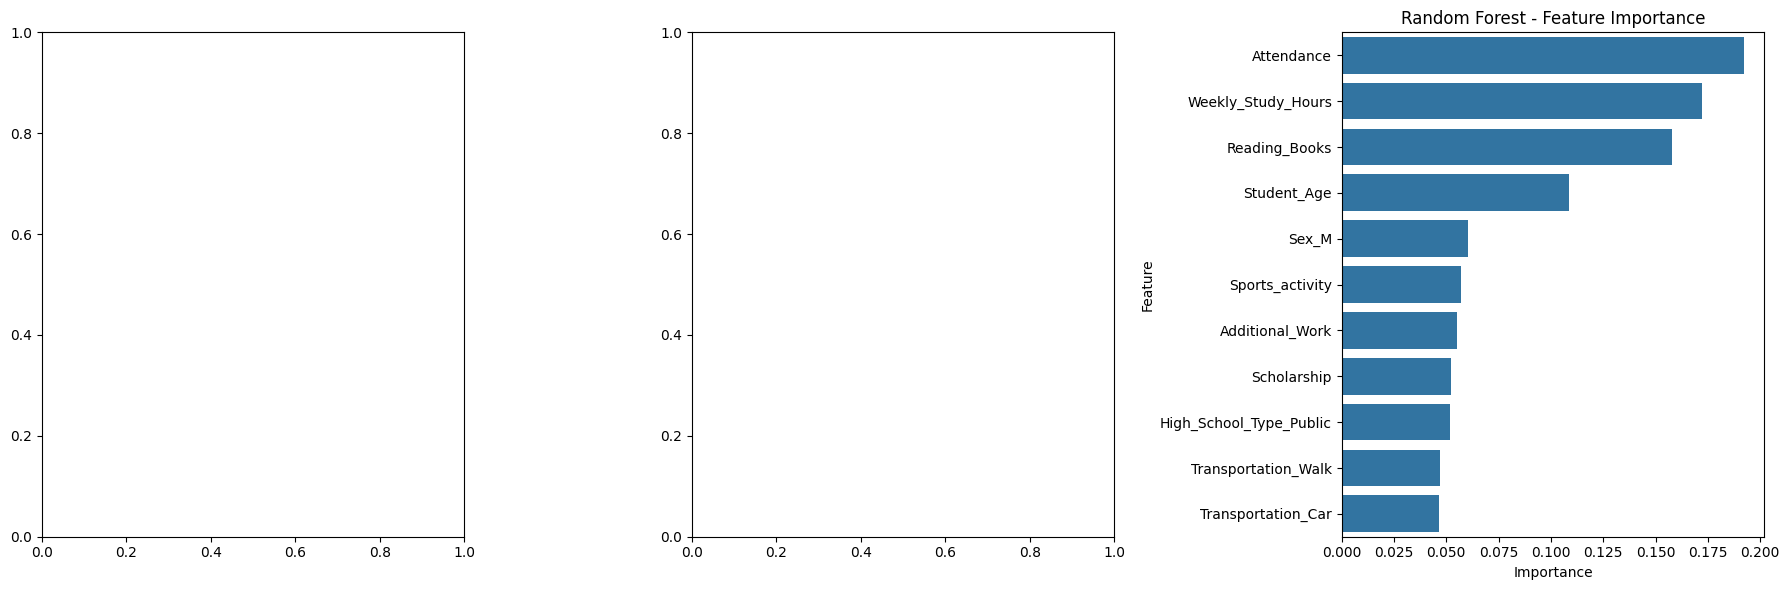

In [33]:
# ==============================
# 1. Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# ==============================
# 2. Buat dataset dummy
np.random.seed(42)
n = 145
df = pd.DataFrame({
    "Student_ID": range(1, n+1),
    "Student_Age": np.random.randint(15, 20, n),
    "Sex": np.random.choice(["M", "F"], n),
    "High_School_Type": np.random.choice(["Public", "Private"], n),
    "Scholarship": np.random.choice([0, 1], n),
    "Additional_Work": np.random.choice([0, 1], n),
    "Sports_activity": np.random.choice([0, 1], n),
    "Transportation": np.random.choice(["Bus", "Car", "Walk"], n),
    "Weekly_Study_Hours": np.random.randint(1, 20, n),
    "Reading_Books": np.random.randint(0, 10, n),
    "Attendance": np.random.randint(50, 100, n),
    "Grade_Class": np.random.choice(["A", "B", "C", "D"], n)  # 🎯 target
})

# ==============================
# 3. Pisahkan fitur & label
X = df.drop(["Student_ID", "Grade_Class"], axis=1)
y = df["Grade_Class"]

# One-hot encoding untuk data kategorikal
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)





# ==============================
# 5. Logistic Regression
log_reg = LogisticRegression(max_iter=1000, multi_class="ovr")
log_reg.fit(X_train, y_train)

# Ambil absolute coefficient (biar jelas besarnya pengaruh)
log_reg_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": np.abs(log_reg.coef_).mean(axis=0)  # rata-rata across classes
}).sort_values(by="Importance", ascending=False)

print("\n📌 Feature Importance - Logistic Regression")
print(log_reg_importance)

# ==============================
# 6. Visualisasi perbandingan

fig, axes = plt.subplots(1, 3, figsize=(18,6))


sns.barplot(x="Importance", y="Feature", data=rf_importance, ax=axes[2])
axes[2].set_title("Random Forest - Feature Importance")

plt.tight_layout()
plt.show()




📌 Feature Importance - Random Forest
                    Feature  Importance
6                Attendance    0.192367
4        Weekly_Study_Hours    0.172250
5             Reading_Books    0.157707
0               Student_Age    0.108798
7                     Sex_M    0.060377
3           Sports_activity    0.056791
2           Additional_Work    0.054885
1               Scholarship    0.052065
8   High_School_Type_Public    0.051646
10      Transportation_Walk    0.046772
9        Transportation_Car    0.046344


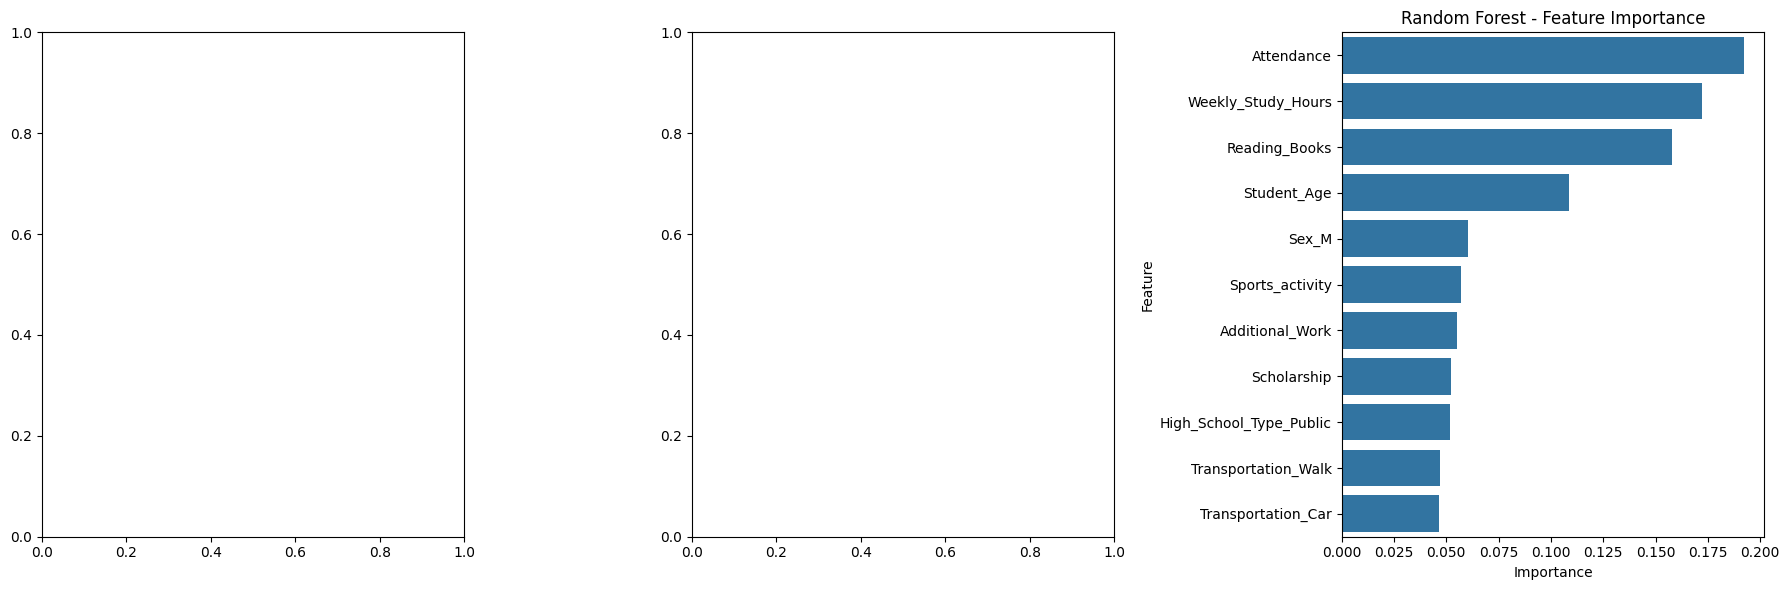

In [14]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# --- Training Random Forest ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# --- Feature Importance dari Random Forest ---
importances_rf = rf.feature_importances_

feat_importance_rf = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances_rf
}).sort_values(by="Importance", ascending=False)

print("\n📌 Feature Importance - Random Forest")
print(feat_importance_rf)


# 6. Random Forest Classifier
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

rf_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# ==============================
# 7. Visualisasi perbandingan
fig, axes = plt.subplots(1, 3, figsize=(18,6))

sns.barplot(x="Importance", y="Feature", data=rf_importance, ax=axes[2])
axes[2].set_title("Random Forest - Feature Importance")

plt.tight_layout()
plt.show()



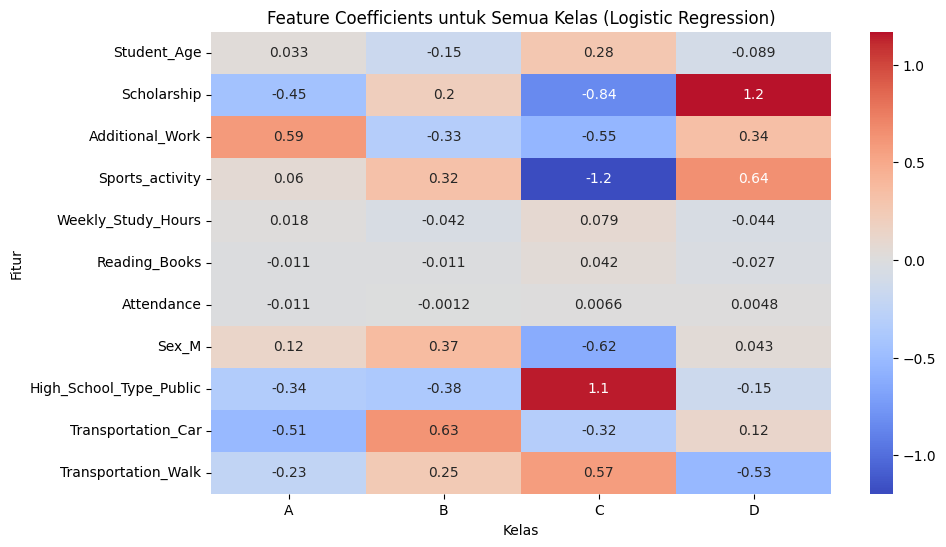

In [34]:
import pandas as pd

# Buat DataFrame dari koefisien semua kelas
coef_df = pd.DataFrame(log_reg.coef_.T, index=features, columns=log_reg.classes_)

plt.figure(figsize=(10,6))
sns.heatmap(coef_df, annot=True, cmap="coolwarm", center=0)
plt.title("Feature Coefficients untuk Semua Kelas (Logistic Regression)")
plt.xlabel("Kelas")
plt.ylabel("Fitur")
plt.show()


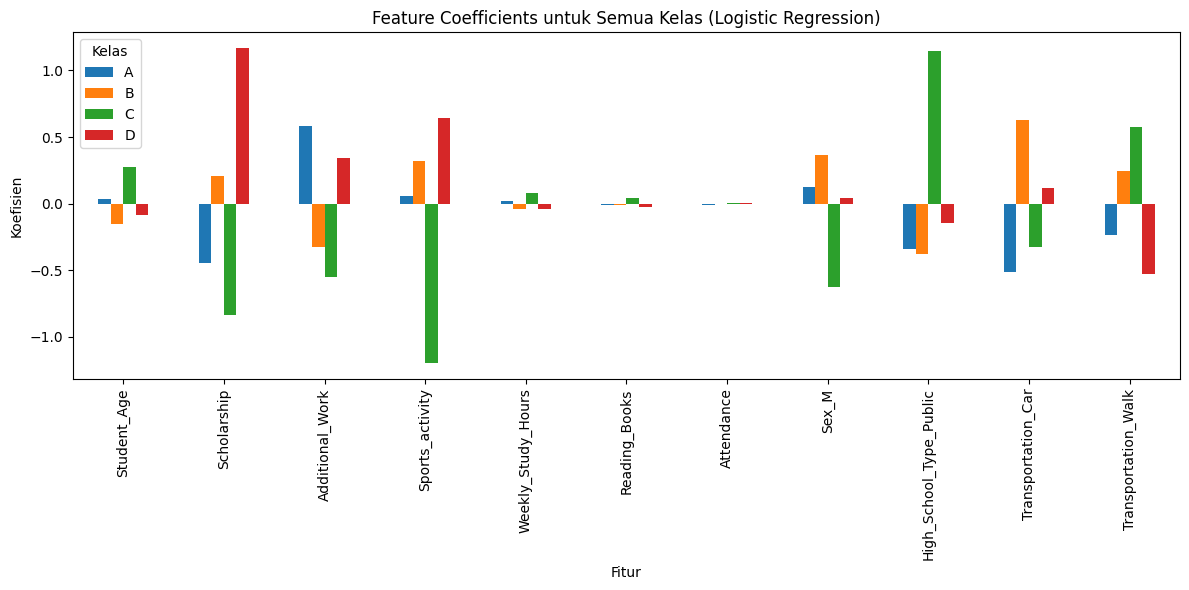

In [35]:
coef_df = pd.DataFrame(log_reg.coef_.T, index=features, columns=log_reg.classes_)

coef_df.plot(kind="bar", figsize=(12,6))
plt.title("Feature Coefficients untuk Semua Kelas (Logistic Regression)")
plt.xlabel("Fitur")
plt.ylabel("Koefisien")
plt.legend(title="Kelas")
plt.tight_layout()
plt.show()
